<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/1_Big_Data_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Que es Spark**

Spar.
Es esencialmente un sistema distribuido que fue diseñado para procesar un gran volumen de datos de manera eficiente y rápida.

En cuanto a la velocidad.

Spark es para ampliar
El popular modelo MAP reduce para emitir de manera eficiente más tipos de cálculo, incluida las consultas interactivas y el procesamiento de transmisiones.

La velocidad es importante en el procesamiento de grandes conjuntos de datos, ya que marca la diferencia entre explorar datos de forma interactiva y esperar minutos u horas.

Una de las principales características que ofrece Spark para la velocidad es la capacidad de ejecutar cálculos en la memoria.

Pero el sistema también es más eficiente que Map reduce para aplicaciones complejas que se ejecutan en disco.


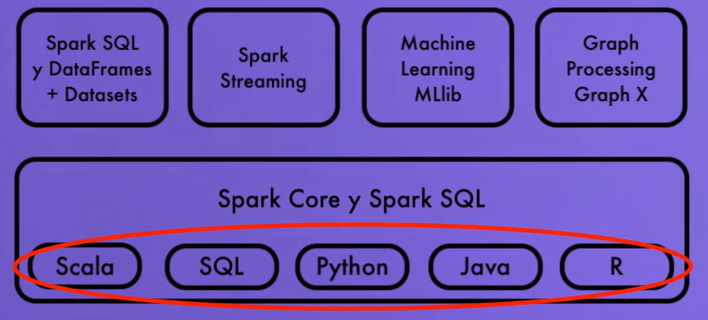

Administradores de cluster por debajo.

Spark está diseñado para escalar eficientemente de uno a miles de nodos de cómputo.

Para lograr esto, mientras maximiza la flexibilidad spark puede ejecutar una variedad de administradores de clústeres, incluidos Hadoop yarn, Apache, mesos y un administrador de clúster simple incluido en el mismo llamado estándar Along schedule.

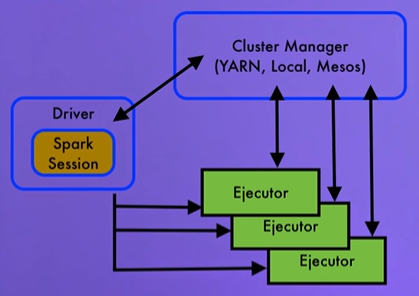

#¿Quién usa spark y para qué?
En esta lección veremos quiénes son las personas que utilizan Spark y cuál es el uso que fundamentalmente hacen cada una de ellas de Spark.

### Comencemos.

Dado que parece un marco de trabajo de propósito general para la computación en cluster, se utiliza  para una amplia gama de aplicaciones.

Podríamos dividir en dos grandes grupos a aquellas personas que usan Spark, los científicos de datos y los ingenieros de datos.


Tareas de científicos de datos La ciencia de datos se centra en el análisis de datos.

Si bien no existe una definición estándar, podríamos decir que un científico de datos es alguien cuya tarea principal es analizar y modelar datos.

Los científicos de datos pueden tener experiencia con SQL, estadística, modelado, predictivo y programación.

Los científicos de datos también tienen experiencias con las técnicas necesarias para transformar los datos en formatos que se pueden analizar para obtener información.

Los científicos de datos usan sus habilidades para analizar datos con el objetivo de responder una pregunta.

A menudo su flujo de trabajo implica un análisis ad hoc, por lo que se utilizan shells interactivos en lugar de crear aplicaciones más complejas, por ejemplo, que les permiten ver los resultados de
las consultas y fragmentos de códigos en el menor tiempo posible.

La velocidad y las API simples de par varían para este tipo de propósito y sus bibliotecas integradas.

Significa que muchos algoritmos están disponibles y listos para ser usados.

Veamos las tareas de ingenieros de datos.

Pensemos en los ingenieros de datos como una gran clase de desarrolladores de software que utilizan el par para crear aplicaciones de procesamiento de datos en ambientes productivos.

Estos desarrolladores suelen comprender los principios de la ingeniería de software como el encapsulado, el el diseño de interfaces y la programación orientada a objetos.

Para los ingenieros de datos, Spark proporciona una forma sencilla de paralelo usar estas aplicaciones entre cluster y oculta la complejidad de la programación de sistemas distribuidos.

La comunicación de red y la tolerancia.

Fallas.

El sistema les da suficiente control para monitorear, inspeccionar y ajustar aplicaciones mientras les permita implementar tareas comunes rápidamente.

Los usuarios de Spark eligen usarlo para sus aplicaciones de procesamiento de datos porque proporciona una amplia variedad de funciones.


# ¿Qué es colab?

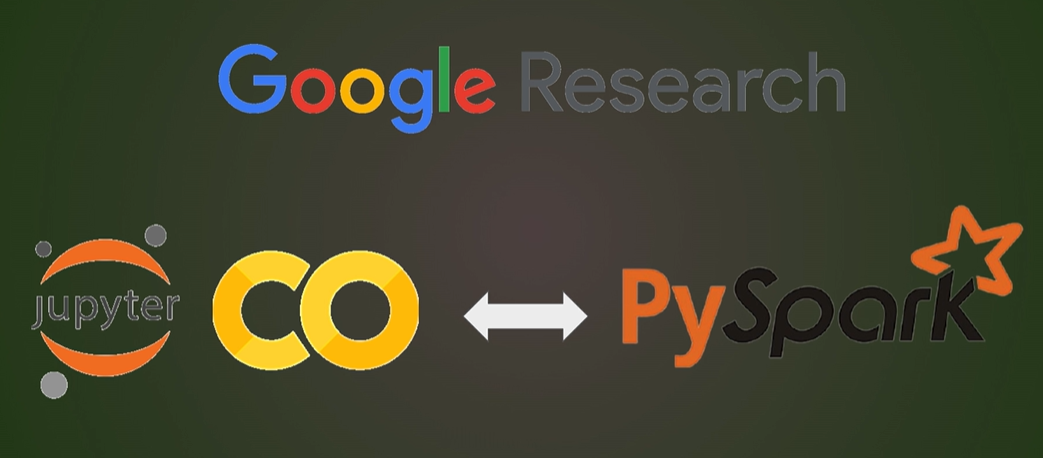

# instalando colab
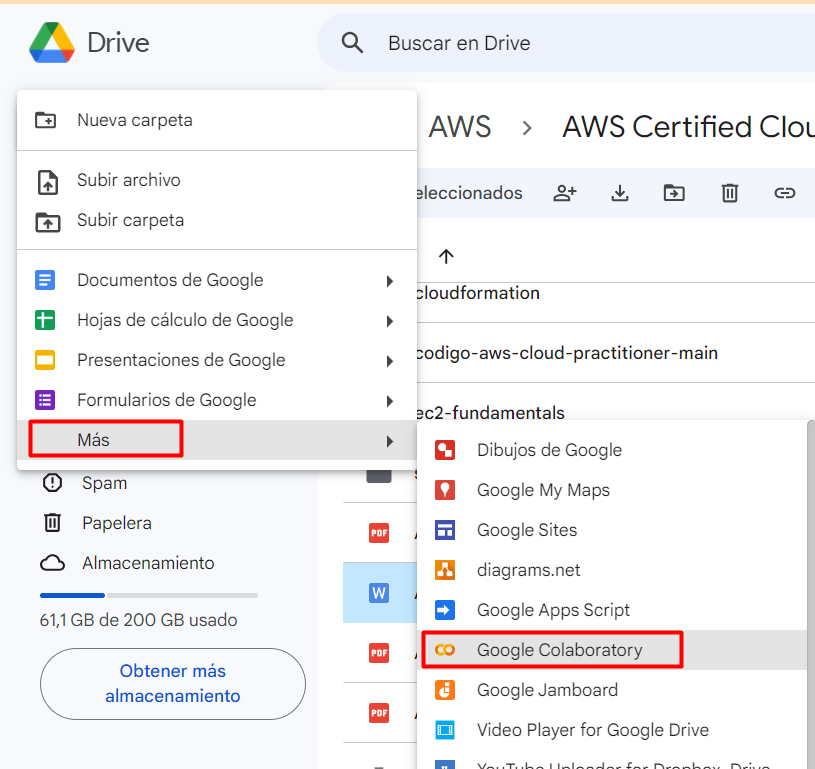

# Descargando e instalando Spark en colab

In [1]:
# Instalar SDK Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [10]:
# Descargar Spark 3.2.2
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [11]:
# Descomprimir el archivo descargado de Spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [12]:
# Establecer las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [13]:
# Instalar la librería findspark
!pip install -q findspark

In [14]:
# Instalar pyspark
!pip install -q pyspark

In [15]:
### verificar la instalación ###
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [16]:
# Probando la sesión de Spark
df = spark.createDataFrame([{"Hola": "Mundo"} for x in range(10)])
df.show(10, False)

+-----+
|Hola |
+-----+
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
+-----+



# ¿Donde podemos ejecutar spark con pyspark?

---



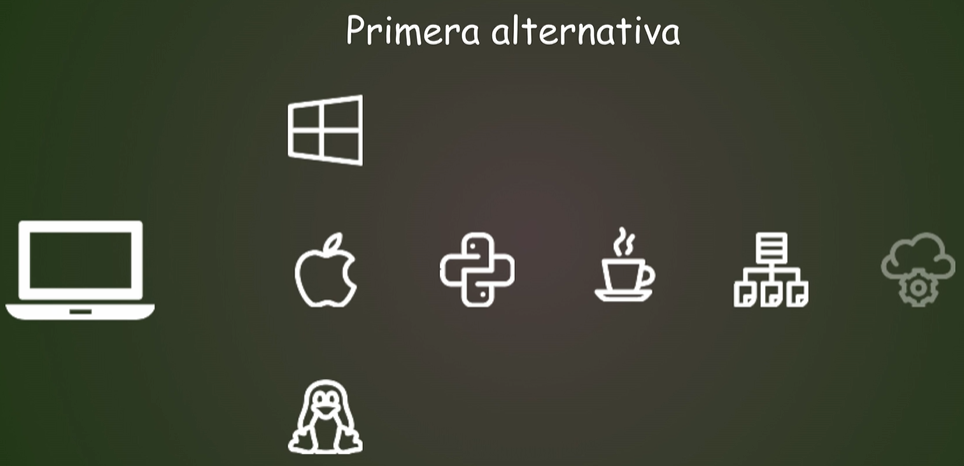

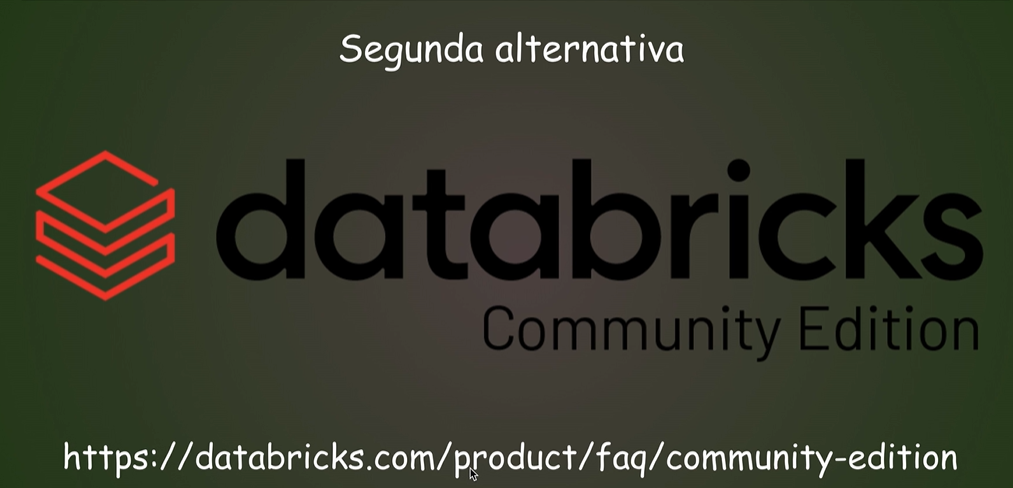

# Introducción a los RDD en Spark


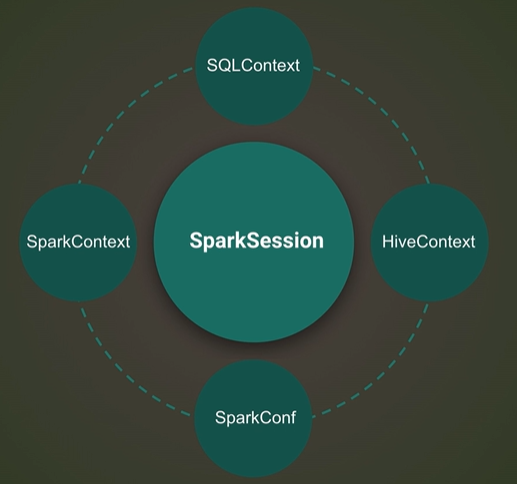

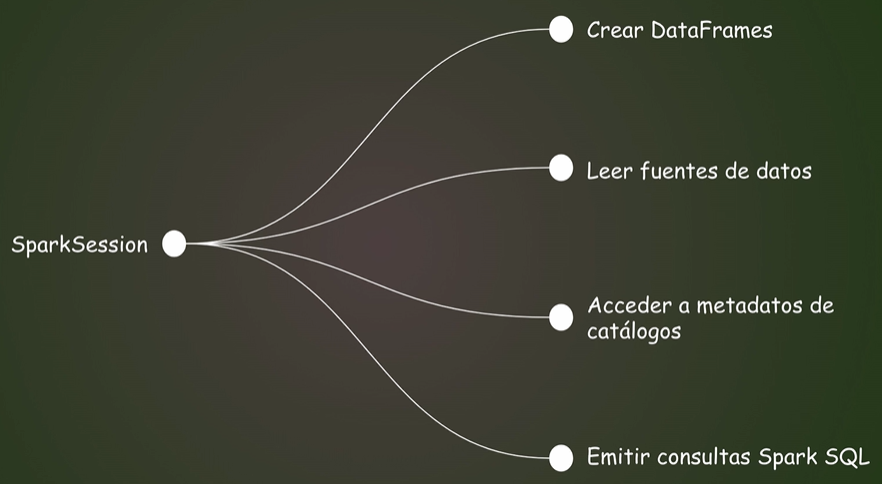

#SparkSesion

In [24]:
# SparkSession, creamos la sesion de spark

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Curso 03MBID').getOrCreate()


In [25]:
#verificamos si se creo el spark
spark

# ¿Qué es un RDD?  
Resilient Distributed Dataset es la abstraccion de spark

## caracteristicas de RDD
* Dependencias
* Particiones
* Función de cálculo

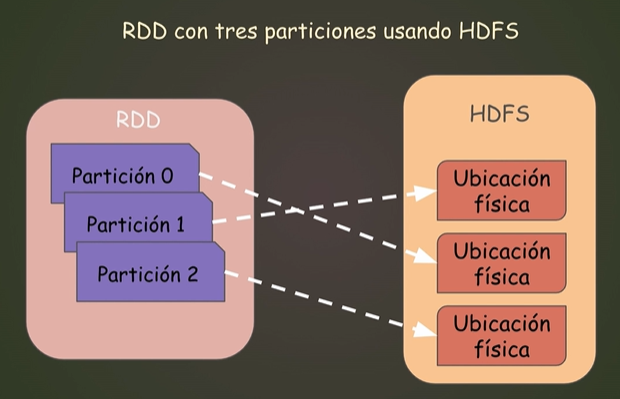

# Diferentes formas de crear un RDD

In [26]:
import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [27]:
# crear una variable spark content
sc = spark.sparkContext

In [28]:
# Crear un RDD vacío

rdd_vacio = sc.emptyRDD

In [31]:
# Crear un RDD con parallelize con particion 3

rdd_vacio3 = sc.parallelize([], 3)
rdd_vacio3.getNumPartitions()

3

In [32]:
# creando rdd con datos
rdd = sc.parallelize([1,2,3,4,5])
rdd

ParallelCollectionRDD[10] at readRDDFromFile at PythonRDD.scala:274

In [33]:
# para leer el rdd utilizamos collect
rdd.collect()

[1, 2, 3, 4, 5]

In [34]:
# Crear un RDD desde un archivo de texto, cada linea representa un registro en rdd

rdd_texto = sc.textFile('./data2.txt')

rdd_texto.collect()

['Entrada\tSalida',
 'Alice;Tarjeta de credito;100\tAlice;250',
 'Alice;Tarjeta de credito;150\tBob;201',
 'Alice;Bizum;200\tLuis;0',
 'Bob;Tarjeta de credito;201\t',
 'Luis;Bizum;300']

In [35]:
# Crear un RDD desde un archivo de texto, ver en un solo registro con wholeTextFiles
rdd_texto_completo = sc.wholeTextFiles('./data2.txt')

rdd_texto_completo.collect()

[('file:/content/data2.txt',
  'Entrada\tSalida\r\nAlice;Tarjeta de credito;100\tAlice;250\r\nAlice;Tarjeta de credito;150\tBob;201\r\nAlice;Bizum;200\tLuis;0\r\nBob;Tarjeta de credito;201\t\r\nLuis;Bizum;300\r\n')]

In [36]:
# crear rdd a partir de unno ya existente, que suma con map
rdd_suma = rdd.map(lambda x: x +1)

rdd_suma.collect()

[2, 3, 4, 5, 6]

In [37]:
# crear rdd a partir de un dataframe
df = spark.createDataFrame([(1, 'jose'), (2, 'juan')], ['id', 'nombre'])

df.show()

+---+------+
| id|nombre|
+---+------+
|  1|  jose|
|  2|  juan|
+---+------+



In [38]:

rdd_df = df.rdd
rdd_df.collect()

[Row(id=1, nombre='jose'), Row(id=2, nombre='juan')]

# ¿Transformaciones en un RDD?

Los RDD son inmutables y cada operación crea unnuevo RDD.

Las operaciones que se pueden realizar sobre un RDD
* Transformaciones
* Acciones

Las Transformaciones

* dividir elemento de entrada
* filtrar elementos
* Realizar calculo de algun tipo


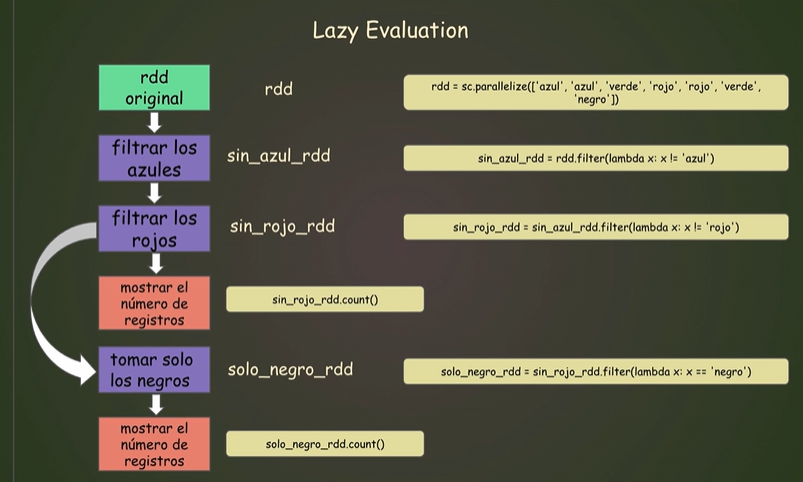

¿Tipo Transformaciones ?

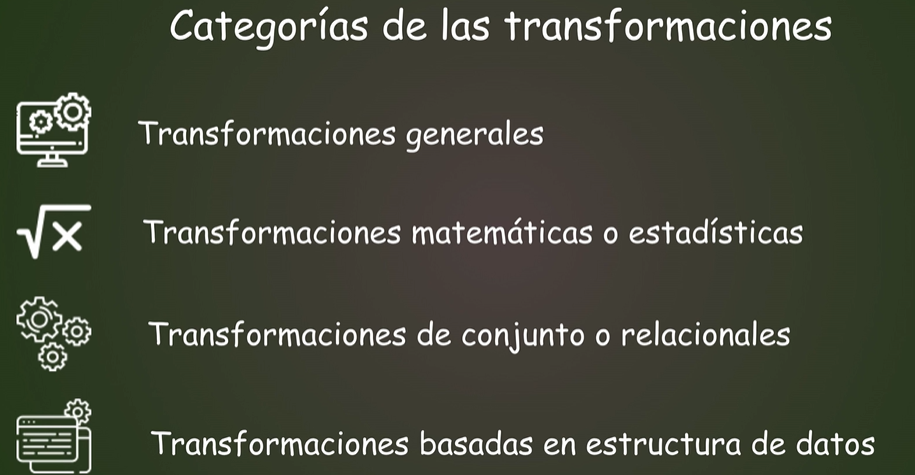

Algunos ejemplos de las Transformaciones

 Transformaciones generales
* map
* filter
* flatMap
* groupBykey
* SortByKey
* combineByKey

Transformaciones Matematicas
* sampleByKey
* randomSplit

Transformaciones de conjunto o relacionales
* cogroup
* join
* subtractByKey
* fullOuterJoin
* leftOuterJoin
* rightOuterJoin

Transformaciones basadas en estructuras de datos
* partitionBy
* repartition
* zipwithIndex
* coalesce


# Transformaciones:  funcion map

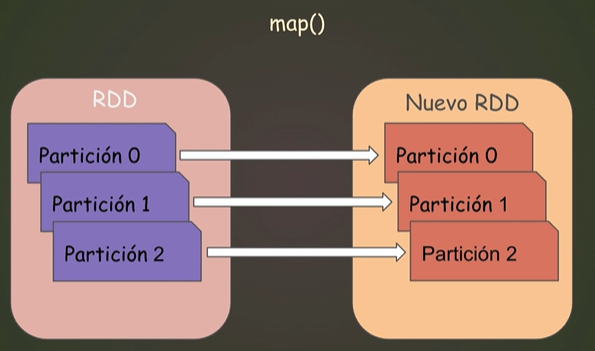

# Transformaciones: función map

In [39]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [40]:
sc = spark.sparkContext


In [41]:
# creamos un rdd
rdd = sc.parallelize([1,2,3,4,5])

In [42]:
rdd_resta = rdd.map(lambda x: x - 1)
rdd_resta.collect()

[0, 1, 2, 3, 4]

In [43]:
rdd_par = rdd.map(lambda x: x % 2 == 0)
rdd_par.collect()

[False, True, False, True, False]

In [45]:
# creamos un rdd de texto
rdd_texto = sc.parallelize(['jose', 'juan', 'lucia'])
# para convertiti en mayuscula
rdd_mayuscula = rdd_texto.map(lambda x: x.upper())
rdd_mayuscula.collect()

['JOSE', 'JUAN', 'LUCIA']

In [46]:
# transformar map siempre da un rdd nuevo
rdd_hola = rdd_texto.map(lambda x: 'Hola ' + x)
rdd_hola.collect()

['Hola jose', 'Hola juan', 'Hola lucia']

# Transformaciones: funcion flatMap

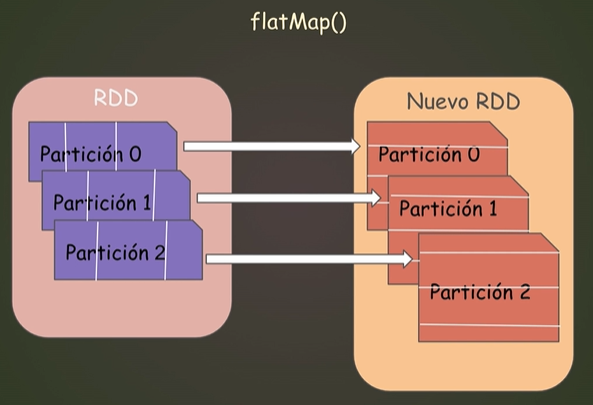

# Transformaciones: función flatMap

In [47]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

sc = spark.sparkContext

In [48]:

rdd = sc.parallelize([1,2,3,4,5])

In [49]:
rdd_cuadrado = rdd.map(lambda x: (x, x ** 2))
rdd_cuadrado.collect()

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [50]:
rdd_cuadrado_flat = rdd.flatMap(lambda x: (x, x ** 2))
rdd_cuadrado_flat.collect()

[1, 1, 2, 4, 3, 9, 4, 16, 5, 25]

In [51]:
rdd_texto = sc.parallelize(['jose', 'juan', 'lucia'])

rdd_mayuscula = rdd_texto.flatMap(lambda x: (x, x.upper()))

rdd_mayuscula.collect()

['jose', 'JOSE', 'juan', 'JUAN', 'lucia', 'LUCIA']

# Transformaciones: función filter

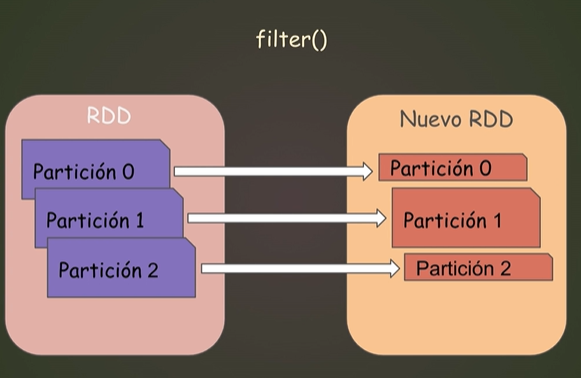

In [52]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [53]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9])

rdd_par = rdd.filter(lambda x: x % 2 == 0)

rdd_par.collect()

[2, 4, 6, 8]

In [54]:
rdd_impar = rdd.filter(lambda x: x % 2 != 0)

rdd_impar.collect()

[1, 3, 5, 7, 9]

In [55]:
rdd_texto = sc.parallelize(['jose', 'juaquin', 'juan', 'lucia', 'karla', 'katia'])
rdd_k = rdd_texto.filter(lambda x: x.startswith('k'))
rdd_k.collect()

['karla', 'katia']

In [56]:

rdd_filtro = rdd_texto.filter(lambda x: x.startswith('j') and x.find('u') == 1)

rdd_filtro.collect()

['juaquin', 'juan']

# Transformaciones: función coalesce

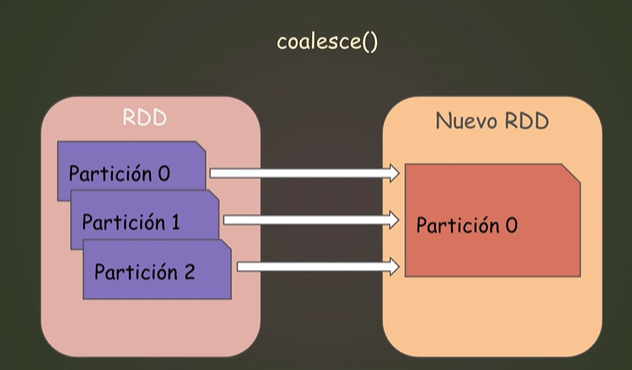

In [57]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [58]:

rdd = sc.parallelize([1,2,3.4,5], 10)

In [59]:

rdd.getNumPartitions()

10

In [60]:

rdd.coalesce(5)
rdd.getNumPartitions()

10

In [61]:
rdd5 = rdd.coalesce(5)

rdd5.getNumPartitions()

5

# Transformaciones: función repartition

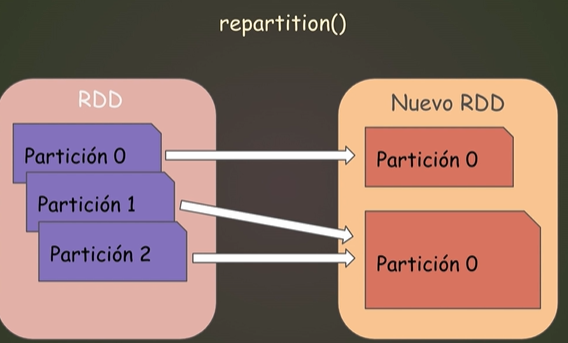

In [62]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [63]:
rdd = sc.parallelize([1,2,3,4,5], 3)

rdd.getNumPartitions()

3

In [64]:
rdd7 = rdd.repartition(7)

rdd7.getNumPartitions()

7

# Transformaciones: función reduceByKey

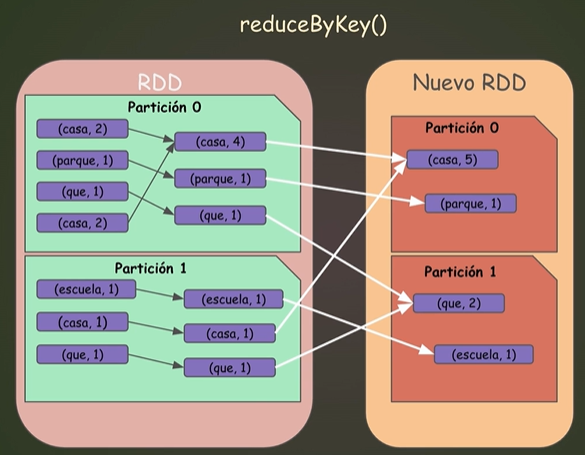

In [65]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [66]:
rdd = sc.parallelize(
    [('casa', 2),
     ('parque', 1),
     ('que', 5),
     ('casa', 1),
     ('escuela', 2),
     ('casa', 1),
     ('que', 1)]
)

In [67]:
rdd.collect()

[('casa', 2),
 ('parque', 1),
 ('que', 5),
 ('casa', 1),
 ('escuela', 2),
 ('casa', 1),
 ('que', 1)]

In [68]:

rdd_reduciodo = rdd.reduceByKey(lambda x,y: x + y)

rdd_reduciodo.collect()

[('parque', 1), ('que', 6), ('casa', 4), ('escuela', 2)]